# Todo
1. Finish code block.
2. Finish experiments and analysis.
3. Upload HW1_name.ipynb to eeclass->homework.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [39]:
print(rd.rand())

0.5880079983679187


#Building environment

In this homework, we are going to implement a 6-armed bandit problem with mean:

$q_*(1)$ |$q_*(2)$ |$q_*(3)$ |$q_*(4)$ |$q_*(5)$ |$q_*(6)$  
:--:|:--:|:--:|:--:|:--:|:--:
0.3|-5|5|-1.1|1|0
<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|

  When you chooce the $n^{th}$ bandit , the reward should be given by a normal distribution with mean $q_∗(n)$ and variance 1.



In [ ]:
class bandit:

  # initialize the means and variance of the bandit
  def __init__(self, mean=[0.3, -5, 5, -1.1, 1, 0], variance = 1):
    self.mean = mean
    self.banditNums = len(mean)
    self.variance = variance
  
  #give a action, recieve a reward
  def step(self, action):
    
    # where action is the chosen bandit (i.e. action is between 0~5)
    # To return a number from a normal distribution, you might want to call the function rd.normal().
    
    ######## your code here ##########
    reward = rd.normal(self.mean[action],self.variance,1)
    ######################################

    return reward


#implement learing process

The learning process in this homework is relatively simple:
1. Choose an action:
  
  Generally speaking, it is better to always choose the best option, but in order to keep the exporation going, we sometimes choose random action with a probability of $\epsilon$.

2. Update the action values:

  After receiving the reward, we will update the action value. In this homework we simply use the average reward as the the action value. Try using the following relationship when updating.

  $NewEstimate\leftarrow OleEstimate + StepSize\bigg[Target - OldEstimate\bigg].$

  $Q_{n+1} = Q_{n}+1/n\times\bigg[R_n - Q_n\bigg]$


In [44]:
class learning:


  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]
    
  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    #進行rand是否大於epsilon 來讓其有exploration(探索)
    if rd.rand() > epsilon:
      #獲得最大值
      action = np.argmax(self.actionValues)
    else:
      #rd.rand() is smaller than epsilon, we make the learning exploration
      action = rd.randint(0,6)
    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########
    self.actionValues[action] = self.actionValues[action] + 1/self.chosenTimes[action]*(reward -self.actionValues[action])
    ######################################

  def run(self, epis, epsilon):
    self.actionValues = [10,10,10,10,10,10]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(epis):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

# Test your results (60%)
- you need to get picture looking like following picture.
- We will use 'matplotlib' to visualize the result. For more information, click on the [LINK](https://matplotlib.org/2.0.2/api/pyplot_api.html) to see the documentation or search tutorials online.

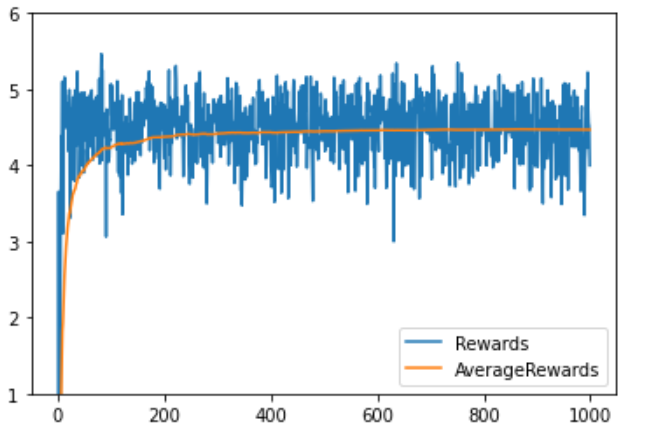

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


[24, 27, 903, 11, 18, 17]


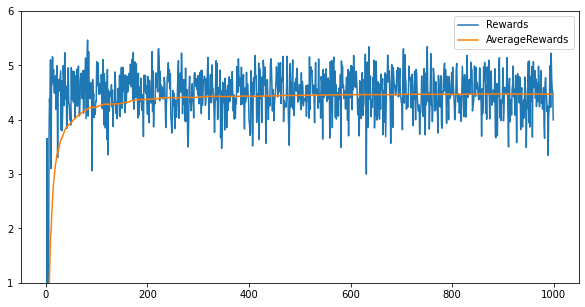

In [45]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.
rewards_all=[]
averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.1)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))
print(HW1.chosenTimes)
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
plt.plot(np.average(rewards_all,axis=0),label="Rewards")
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards")
plt.legend()
plt.ylim(1,6)
plt.show()




# Experiments and Analysis(40%)

Q1(20%) Get average rewards curves of different settings over 1000 episodes and average the 
result of 30 learning process into a figure.


▪ Vary 𝜀 value with 0, 0.2, 0.8. What happens? Why? Please plot the curves
into a figure.



A1:會發現其收斂的值落在不同高度，這是因為epsilon越高，則代表他要越多的探索，就不會執行最佳解，會造成其reward的range較大，又在畫圖時會將reward先做一次平均，自然會發現其輸出的值會變小可以從下圖中看出來，epsilon越低者，其最後出來的average reward越小

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


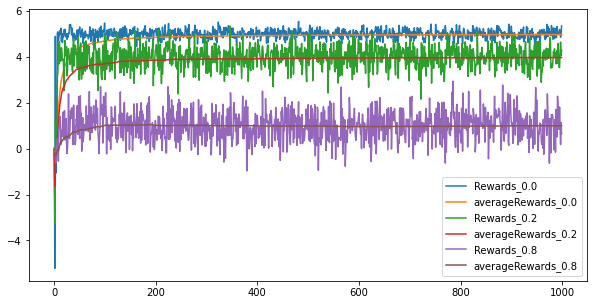

In [37]:
Q1 = learning()

rewards_all_0=[]
averageRewards_all_0=[]

rewards_all_1=[]
averageRewards_all_1=[]

rewards_all_2=[]
averageRewards_all_2=[]

rd.seed(1)

for i in range(30): 
  rewards, averageRewards = Q1.run(epis = 1000, epsilon = 0.0)
  rewards_all_0.append(np.array(rewards))  
  averageRewards_all_0.append(np.array(averageRewards))

for i in range(30): 
  rewards, averageRewards = Q1.run(epis = 1000, epsilon = 0.2)
  rewards_all_1.append(np.array(rewards))  
  averageRewards_all_1.append(np.array(averageRewards))

for i in range(30): 
  rewards, averageRewards = Q1.run(epis = 1000, epsilon = 0.8)
  rewards_all_2.append(np.array(rewards))  
  averageRewards_all_2.append(np.array(averageRewards))



plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(0)
plt.plot(np.average(rewards_all_0, axis = 0),label = "Rewards_0.0")
plt.plot(np.average(averageRewards_all_0,axis = 0), label = "averageRewards_0.0")
plt.plot(np.average(rewards_all_1,axis = 0),label = "Rewards_0.2")
plt.plot(np.average(averageRewards_all_1,axis = 0), label = "averageRewards_0.2")
plt.plot(np.average(rewards_all_2,axis = 0),label = "Rewards_0.8")
plt.plot(np.average(averageRewards_all_2,axis = 0), label = "averageRewards_0.8")
plt.legend()
#plt.ylim(,6)
plt.show()

Q2(10%) Is there any way to always get the best result when 𝜀 = 0? How?

A2:有，將每一次在run的function裡，將其mean value較低的其他五個的actionValue都設定成0，這樣其就會全部使用mean較大的動作，可以從下列的程式碼得知






/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


[0, 0, 1000, 0, 0, 0]


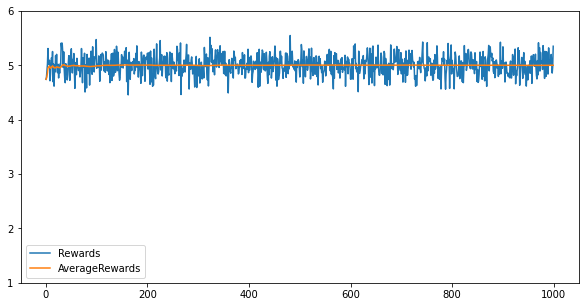

In [20]:
class learning:


  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]

  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    #進行rand是否大於epsilon 來讓其有exploration(探索)
    if rd.rand() > epsilon:
      #獲得最大值
      action = np.argmax(self.actionValues)
    else:
      #rd.rand() is smaller than epsilon, we make the learning exploration
      action = rd.randint(0,5)
    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########
    self.actionValues[action] = self.actionValues[action] + 1/self.chosenTimes[action]*(reward -self.actionValues[action])
    ######################################

  def run(self, epis, epsilon):
    self.actionValues = [0,0,10,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(epis):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

HW1 = learning()

# You might want to modify the following code to get different figure for the report.
rewards_all=[]
averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.0)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))

print(HW1.chosenTimes)
plt.figure(0)
plt.plot(np.average(rewards_all,axis=0),label="Rewards")
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards")
plt.legend()
plt.ylim(1,6)
plt.show()




Q3(10%)Is there a way to compute the value of convergence?

可以從公式中與圖做比較當epsilon = 0，可以知道其值一定為action value較大的那一個，當epsilon = 1時，就是機率問題，所以要除與6，因為大家被選到的機率為一樣大小，而介於這之間，就是必須依靠其epsilon大小來決定，越小則會越接近最佳解，越大則會造成value of convergence下降
$$con=(1-\epsilon)*q_*(3)+\sum_{i=1}^6{\epsilon\over6}*q_*(i)$$